<a href="https://colab.research.google.com/github/Motaweh22/ITI-SummerCodeCamp-2025-2024/blob/main/Day1-DataPreparationAndExploration/Motawea_Mohammed_Motawea_(ITI_Summer_AI_G4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
customers_info = pd.read_csv('/content/customers_info.csv')
labels = pd.read_csv('/content/labels.csv')
loan_info = pd.read_csv('/content/loan_info.csv')

In [ ]:
# Merge the datasets on 'CUSTOMER_ID' and 'ACCOUNT_NUMBER'
merged_data = pd.merge(customers_info, labels, on='CUSTOMER_ID', how='inner')
merged_data = pd.merge(merged_data, loan_info, on=['CUSTOMER_ID', 'ACCOUNT_NUMBER'], how='inner')


In [ ]:
# Save the merged data to a CSV file
merged_data.to_csv('/content/merged_data_output.csv', index=False)

In [ ]:
# Display the first few rows of the merged data
print(merged_data.head())

   CUSTOMER_ID SEX CUSTOMER_OPEN_DATE  BIRTH_DATE  PROFESSION  Unnamed: 0  \
0            1   M         2015-10-27  1986-03-24    EMPLOYEE           0   
1            2   M         2015-11-29  1985-08-18    EMPLOYEE           1   
2            3   F         2015-12-28  1985-07-02   HOUSEWIFE           2   
3            4   M         2015-10-21  1979-01-01  Shop Owner           3   
4            5   M         2015-11-02  1977-01-20  Shop Owner           4   

   ACCOUNT_NUMBER  label                                 PROGRAM_NAME  \
0               1      0       Auto Loans 50% Down Payment - Employed   
1               2      0                     Pick Up and Small Trucks   
2               3      0       Auto Loans 40% Down Payment - Employed   
3               4      0  Auto Loans 30% Down Payment - Self Employed   
4               5      0  Auto Loans 30% Down Payment - Self Employed   

  LOAN_OPEN_DATE EXPECTED_CLOSE_DATE  ORIGINAL_BOOKED_AMOUNT    CAR_TYPE  
0     11/25/2015       

In [ ]:

# Set the visual style
sns.set(style="whitegrid")


In [ ]:
# Load the dataset
file_path = '/content/merged_data_output.csv'
df = pd.read_csv(file_path)

In [ ]:
# Data Cleaning
df_cleaned = df.drop(columns=['Unnamed: 0'])  # Drop redundant column
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicates

In [ ]:
# Convert date columns to datetime format
date_columns = ['CUSTOMER_OPEN_DATE', 'BIRTH_DATE', 'LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE']
df_cleaned[date_columns] = df_cleaned[date_columns].apply(pd.to_datetime, errors='coerce')


In [ ]:
# Handle missing values
df_cleaned = df_cleaned.dropna(subset=['SEX', 'BIRTH_DATE', 'ORIGINAL_BOOKED_AMOUNT'])
df_cleaned['PROFESSION'].fillna('Unknown', inplace=True)
df_cleaned['CAR_TYPE'].fillna('Unknown', inplace=True)


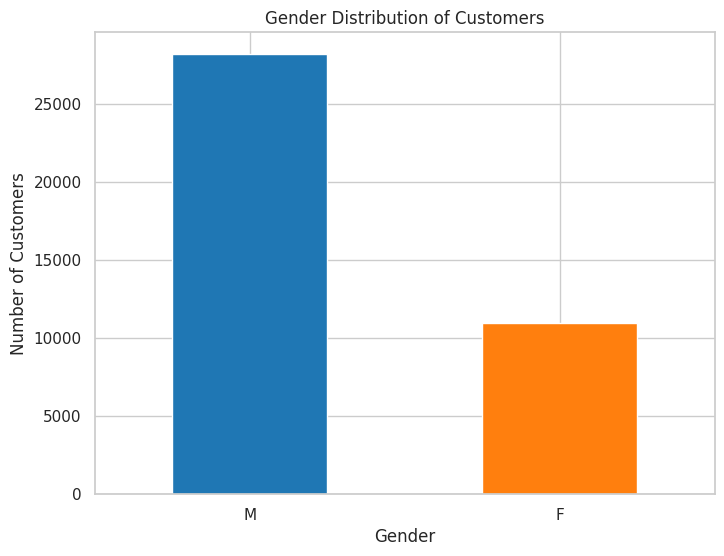

In [ ]:
# 1. Gender Distribution
plt.figure(figsize=(8, 6))
gender_dist = df_cleaned['SEX'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

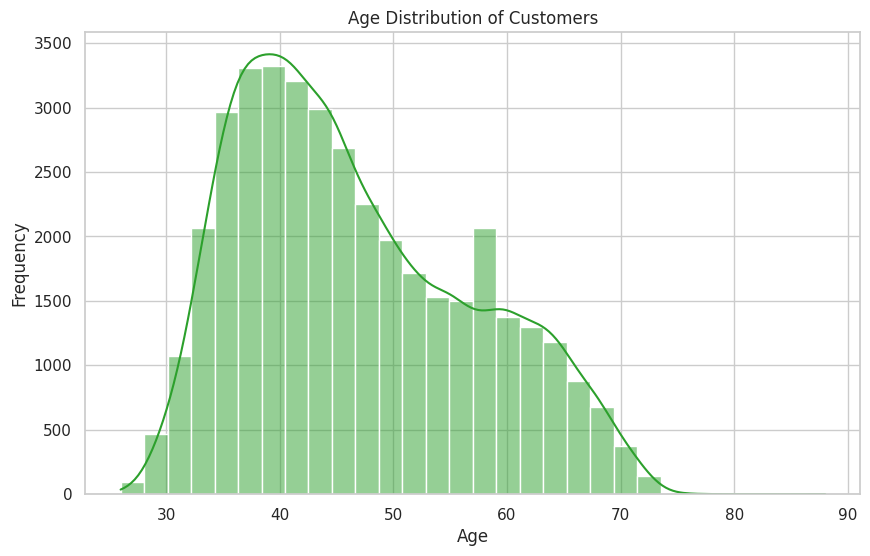

In [ ]:
# 2. Age Distribution
df_cleaned['AGE'] = (pd.to_datetime('today') - df_cleaned['BIRTH_DATE']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['AGE'], kde=True, bins=30, color='#2ca02c')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

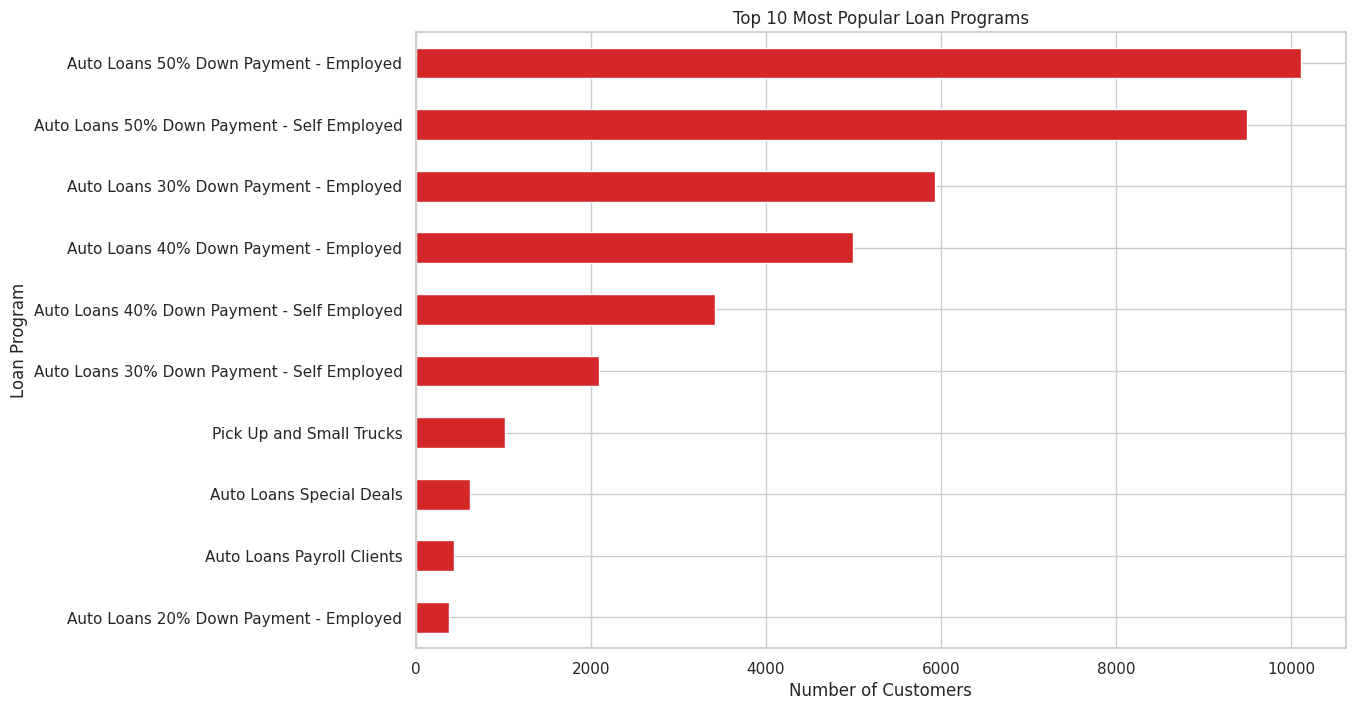

In [ ]:
# 3. Loan Program Popularity
plt.figure(figsize=(12, 8))
program_dist = df_cleaned['PROGRAM_NAME'].value_counts().head(10).plot(kind='barh', color='#d62728')
plt.title('Top 10 Most Popular Loan Programs')
plt.xlabel('Number of Customers')
plt.ylabel('Loan Program')
plt.gca().invert_yaxis()
plt.show()

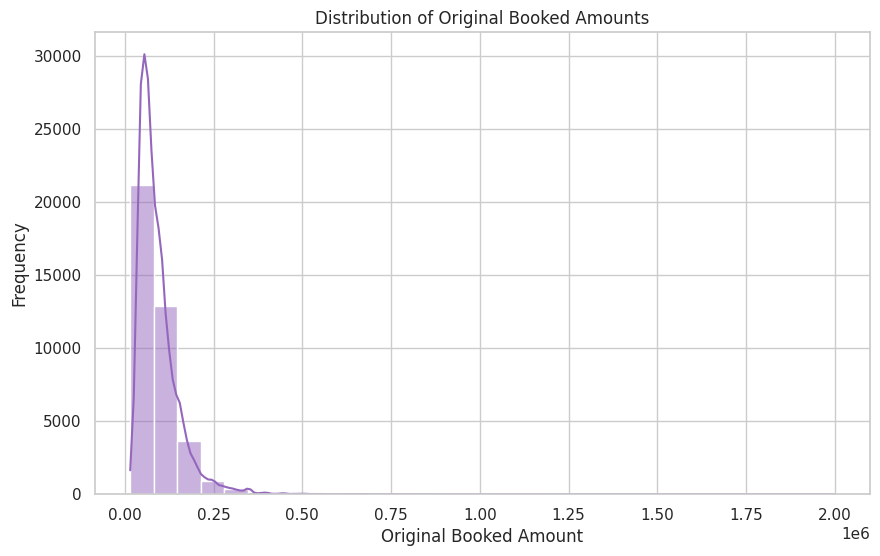

In [ ]:
# 4. Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ORIGINAL_BOOKED_AMOUNT'], kde=True, bins=30, color='#9467bd')
plt.title('Distribution of Original Booked Amounts')
plt.xlabel('Original Booked Amount')
plt.ylabel('Frequency')
plt.show()


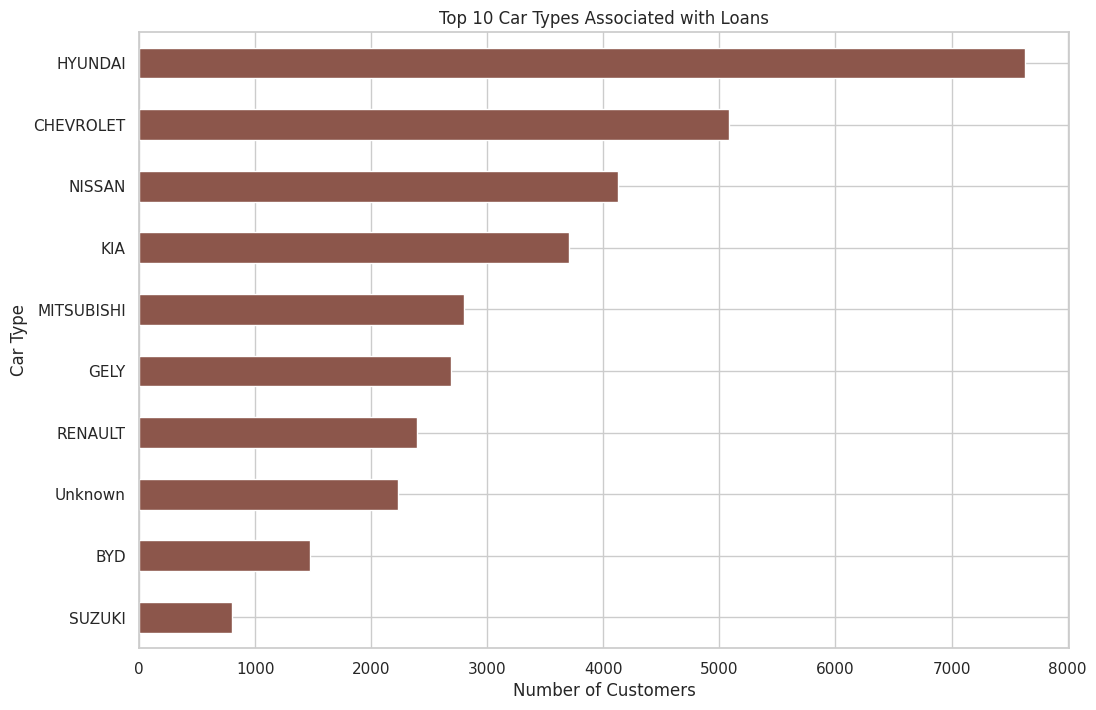

In [ ]:
# 5. Car Type Distribution
plt.figure(figsize=(12, 8))
car_type_dist = df_cleaned['CAR_TYPE'].value_counts().head(10).plot(kind='barh', color='#8c564b')
plt.title('Top 10 Car Types Associated with Loans')
plt.xlabel('Number of Customers')
plt.ylabel('Car Type')
plt.gca().invert_yaxis()
plt.show()
